In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Algerian_Forest_cleaned_dataset.csv")
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
data.drop(['day','month','year'],axis=1,inplace=True)

In [4]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
data["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [6]:
data['Classes'] = np.where(data['Classes'].str.contains('not fire'),0,1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int64  
dtypes: float64(7), int32(1), int64(4)
memory usage: 22.0 KB


In [8]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [9]:
x = data.drop('FWI',axis= 1)
y = data['FWI']

In [10]:
## we have to split the data into train and test part
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=12)

In [11]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((194, 11), (194,), (49, 11), (49,))

In [12]:
corr = x_train.corr()
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656957,-0.257403,-0.335232,0.685635,0.493681,0.409331,0.607424,0.476957,0.531608,0.246444
RH,-0.656957,1.000000,0.189727,0.214901,-0.648051,-0.418886,-0.245043,-0.686134,-0.368322,-0.446870,-0.370195
Ws,-0.257403,0.189727,1.000000,0.184737,-0.141475,0.016477,0.068511,0.054516,0.038304,-0.009962,-0.118533
Rain,-0.335232,0.214901,0.184737,1.000000,-0.537996,-0.289123,-0.302638,-0.357214,-0.301873,-0.375158,-0.006417
FFMC,0.685635,-0.648051,-0.141475,-0.537996,1.000000,0.599867,0.511770,0.752568,0.591708,0.762805,0.169071
DMC,0.493681,-0.418886,0.016477,-0.289123,0.599867,1.000000,0.871976,0.701233,0.981911,0.576028,0.180193
DC,0.409331,-0.245043,0.068511,-0.302638,0.511770,0.871976,1.000000,0.530842,0.939080,0.508731,-0.085873
ISI,0.607424,-0.686134,0.054516,-0.357214,0.752568,0.701233,0.530842,1.000000,0.669325,0.755753,0.240565
BUI,0.476957,-0.368322,0.038304,-0.301873,0.591708,0.981911,0.939080,0.669325,1.000000,0.580451,0.078415
Classes,0.531608,-0.446870,-0.009962,-0.375158,0.762805,0.576028,0.508731,0.755753,0.580451,1.000000,0.126895


<Axes: >

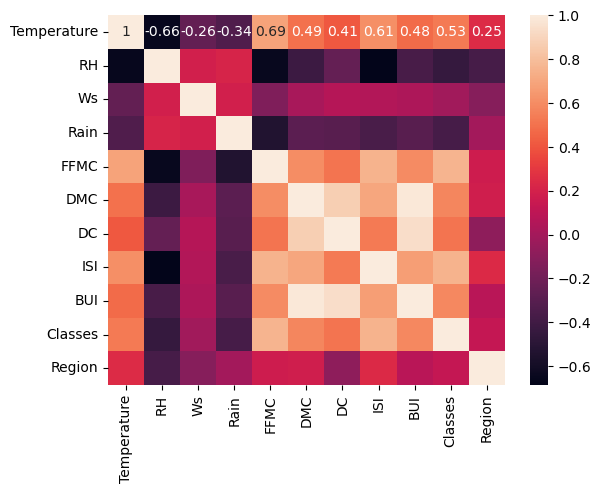

In [13]:
sns.heatmap(corr,annot=True)

In [14]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold :
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [15]:
corr_features = correlation(x_train,0.85)

In [16]:
x_train.drop(corr_features,axis=1,inplace = True)
x_test.drop(corr_features,axis=1,inplace = True)
x_train.shape,x_test.shape

((194, 9), (49, 9))

In [18]:
## we have to standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Box PLot to understand Effect of Standard Scaler

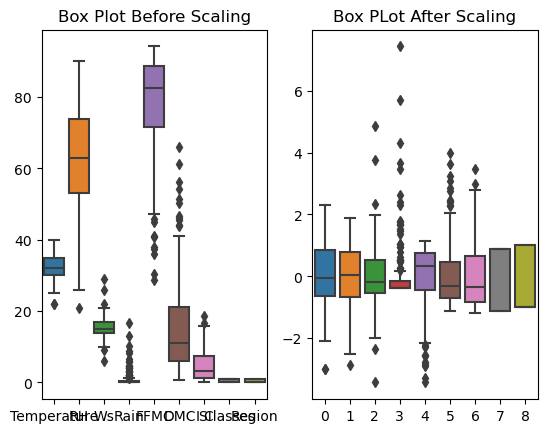

In [22]:
#plt.subplot(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title("Box Plot Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaled)
plt.title("Box PLot After Scaling")
plt.show()

## Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression

In [39]:
model = LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [40]:
y_pred = model.predict(x_test_scaled)
y_pred

array([ 2.13557044,  0.19065472, 10.0683675 ,  0.62814171,  6.52884967,
       14.53658312, -0.41474939,  9.76458495, 10.31411058, -0.30933913,
       -0.0900021 ,  7.26000888, -0.53799673, 17.12684986,  0.34868389,
        0.74403564, -0.27044931,  7.5258074 , 11.03083863,  0.20466012,
        4.49185807, 26.20515801, 20.59340962, 27.10365951,  1.92126335,
        4.7025886 , -0.3626814 ,  5.85293029,  7.68645141, 16.05975548,
       -0.15097407,  1.48299959, 22.55050433, 23.96929211, 14.79859152,
        2.93272493,  7.31780213,  2.58664296,  3.58805157,  6.54453049,
       -0.95645109, -0.49194667,  8.18478496,  0.43819393, 20.08672942,
        5.48191516,  9.30576349,  5.43114073,  5.64795947])

#### Performance Matrix

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [42]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(mae)
print(mse)

0.9430609420315059
5.21851712784531


In [44]:
score = r2_score(y_test,y_pred)
score

0.8964024836963292

## Lasso Regression

In [46]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [47]:
lasso.fit(x_train_scaled,y_train)

Lasso()

In [48]:
pred1 = lasso.predict(x_test_scaled)

In [49]:
mean_absolute_error(y_test,pred1)

1.2462790051291617

In [50]:
r2_score(y_test,pred1)

0.9141728765575938

## Ridge Regression

In [51]:
from sklearn.linear_model import Ridge
ridge = Ridge()


In [52]:
ridge.fit(x_train_scaled,y_train)

Ridge()

In [53]:
pred2 = ridge.predict(x_test_scaled)

In [54]:
mean_absolute_error(y_test,pred2)

0.9457840568647778

In [55]:
r2_score(y_test,pred2)

0.8993422837173635

## ElasticNet

In [56]:
from sklearn.linear_model import ElasticNet
model1 = ElasticNet()

In [57]:
model1.fit(x_train_scaled,y_train)

ElasticNet()

In [58]:
pred3 = model1.predict(x_test_scaled)

In [59]:
mean_absolute_error(y_test,pred3)

1.7892331131337036

In [60]:
r2_score(y_test,pred3)

0.8809350389768373

### Pickling

In [61]:
import pickle

In [63]:
model = pickle.dump(ridge,open('ridge.pkl','wb'))
scaler = pickle.dump(scaler,open('scaler.pkl','wb'))